# Problem Statement 

To develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Variable Description

This dataset is about 2014 Major League Baseball seasons.

# Independent Variables / Features

1. R : Runs scored - number of times reached home plate legally and safely
2. AB : At Bats - plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
3. H : Hits - reaching base because of a batted, fair ball without error by the defense
4. 2B : Doubles - hits on which the batter reaches second base safely without the contribution of a fielding error
5. 3B : Tripples - hits on which the batter reaches third base safely without the contribution of a fielding error
6. HR : Home Runs - hits on which the batter successfully touched all four bases, without the contribution of a fielding error
7. BB : Walks(Base on Balls) - hitter not swinging at four pitches called out of the strike zone and awarded first base.
8. SO : StrikeOut - number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the         third strike or batter may attempt to run to first base
9. SB : Stolen Bases - number of bases advanced by the runner while the ball is in the possession of the defense
10. RA : Number of runs allowed
11. ER : Earned Runs - number of runs that did not occur as a result of errors or passed balls
12. ERA : Earned run Average - total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
13. CG : Complete Game : number of games where player was the only pitcher for their team.
14. SHO : Shutout - number of games where player was the only pitcher for their team
15. Sv : Saves - number of games where the pitcher enters a game led by the pitcher's team, finishes the game without                    surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher              entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more          innings
16. E : Errors - number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

# Dependent Variable / Label

W : number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to         pitch at least 5 innings of work (also related: winning percentage)
    W + S – Wins in relief + saves.

# Top 5 rows of the dataset

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Last 5 rows of dataset

In [4]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Shape of dataset

In [5]:
data.shape

(30, 17)

There are total 30 rows and 17 columns in our dataset.

# Brief Statistics 

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


from the above summary it seems that there are no null values in our dataset.

# Datatype

In [7]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

It shows that all the variables are numeric in form

# let's check once again for null values

In [8]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present in the dataset

# Scatterplot

<AxesSubplot:xlabel='R', ylabel='W'>

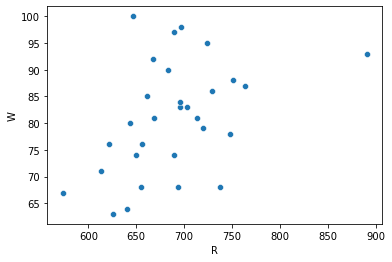

In [10]:
sns.scatterplot(x="R", y="W", data=data)

The above scatterplot shows that increase in Runs scored results in increase in no. of Wins.

<AxesSubplot:xlabel='AB', ylabel='W'>

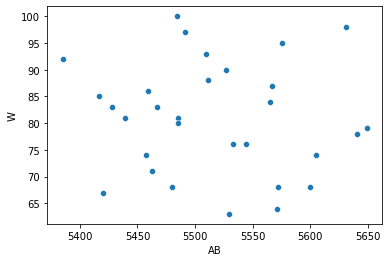

In [11]:
sns.scatterplot(x="AB", y="W", data=data)

It shows that there is no relation between 'AB' and 'W'.

<AxesSubplot:xlabel='H', ylabel='W'>

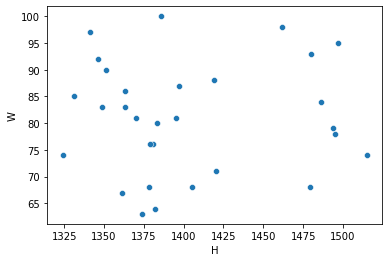

In [15]:
sns.scatterplot(x="H", y="W", data=data)

It shows that there is no relation between 'H' and 'W'.

<AxesSubplot:xlabel='2B', ylabel='W'>

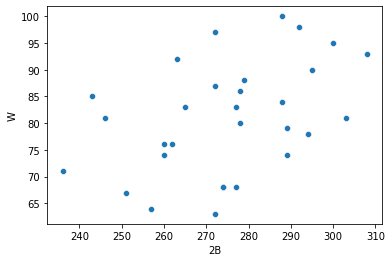

In [16]:
sns.scatterplot(x="2B", y="W", data=data)

There are low positive correlation between '2B' and 'W'.

<AxesSubplot:xlabel='3B', ylabel='W'>

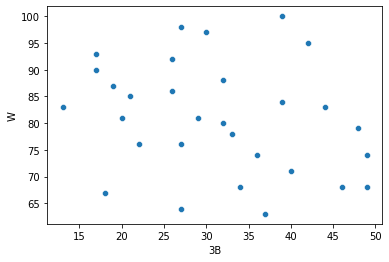

In [17]:
sns.scatterplot(x="3B", y="W", data=data)

It shows that there is no relation between '3B' and 'W'.

<AxesSubplot:xlabel='HR', ylabel='W'>

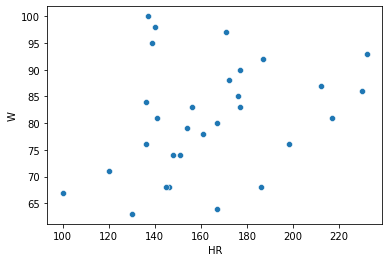

In [19]:
sns.scatterplot(x="HR", y="W", data=data)

No correlation pattern seens in the above scatterplot.

<AxesSubplot:xlabel='BB', ylabel='W'>

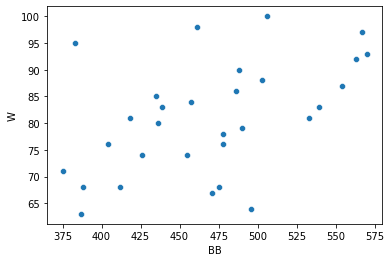

In [20]:
sns.scatterplot(x="BB", y="W", data=data)

There is low positive correlation in 'BB' and 'W'.

<AxesSubplot:xlabel='SO', ylabel='W'>

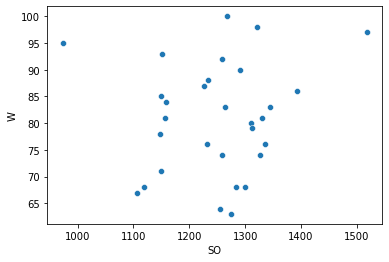

In [21]:
sns.scatterplot(x="SO", y="W", data=data)

No relation between 'SO' and 'W'.

<AxesSubplot:xlabel='SB', ylabel='W'>

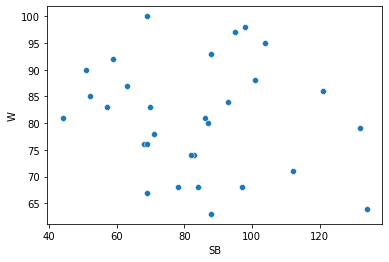

In [22]:
sns.scatterplot(x="SB", y="W", data=data)

there is no considerable relationship between 'SB' and 'W'.

<AxesSubplot:xlabel='RA', ylabel='W'>

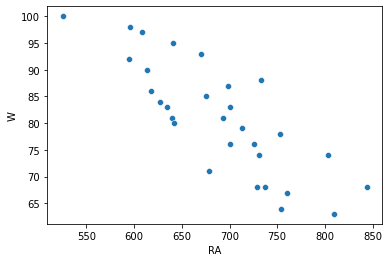

In [23]:
sns.scatterplot(x="RA", y="W", data=data)

The above scatterplot shows that increase in 'RA' results decrease in 'W'.

<AxesSubplot:xlabel='ER', ylabel='W'>

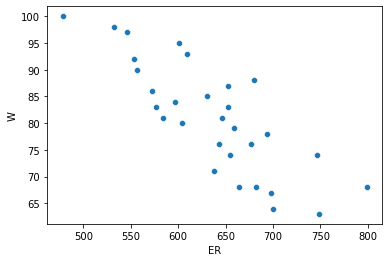

In [24]:
sns.scatterplot(x="ER", y="W", data=data)

The above scatterplot shows that increase in 'ER' results decrease in 'W'.

<AxesSubplot:xlabel='ERA', ylabel='W'>

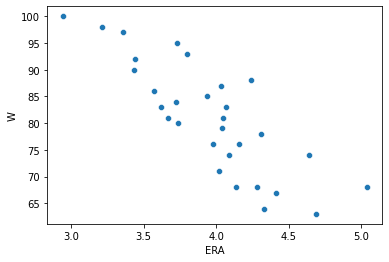

In [25]:
sns.scatterplot(x="ERA", y="W", data=data)

The above scatterplot shows that increase in 'ERA' results decrease in 'W'.

<AxesSubplot:xlabel='CG', ylabel='W'>

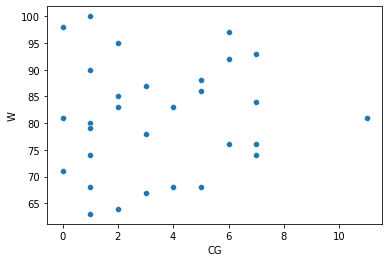

In [26]:
sns.scatterplot(x="CG", y="W", data=data)

No considerable relationship between 'CG' and 'W'.

<AxesSubplot:xlabel='SHO', ylabel='W'>

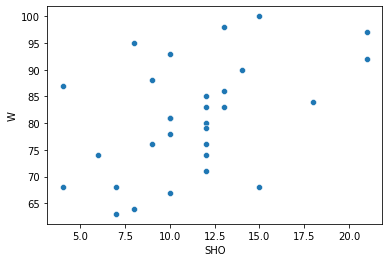

In [27]:
sns.scatterplot(x="SHO", y="W", data=data)

There is low positive correlation between 'SHO' and 'w'.

<AxesSubplot:xlabel='SV', ylabel='W'>

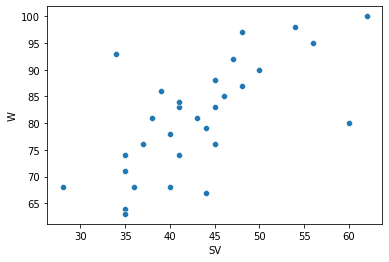

In [28]:
sns.scatterplot(x="SV", y="W", data=data)

The above scatterplot shows that increase in 'SV' increases the value of 'W'.

<AxesSubplot:xlabel='E', ylabel='W'>

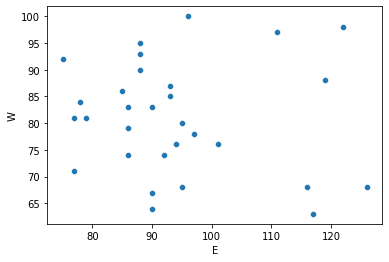

In [29]:
sns.scatterplot(x="E", y="W", data=data)

There is no correlation between 'E' and 'W'.

# Checking for Distribution of Variables

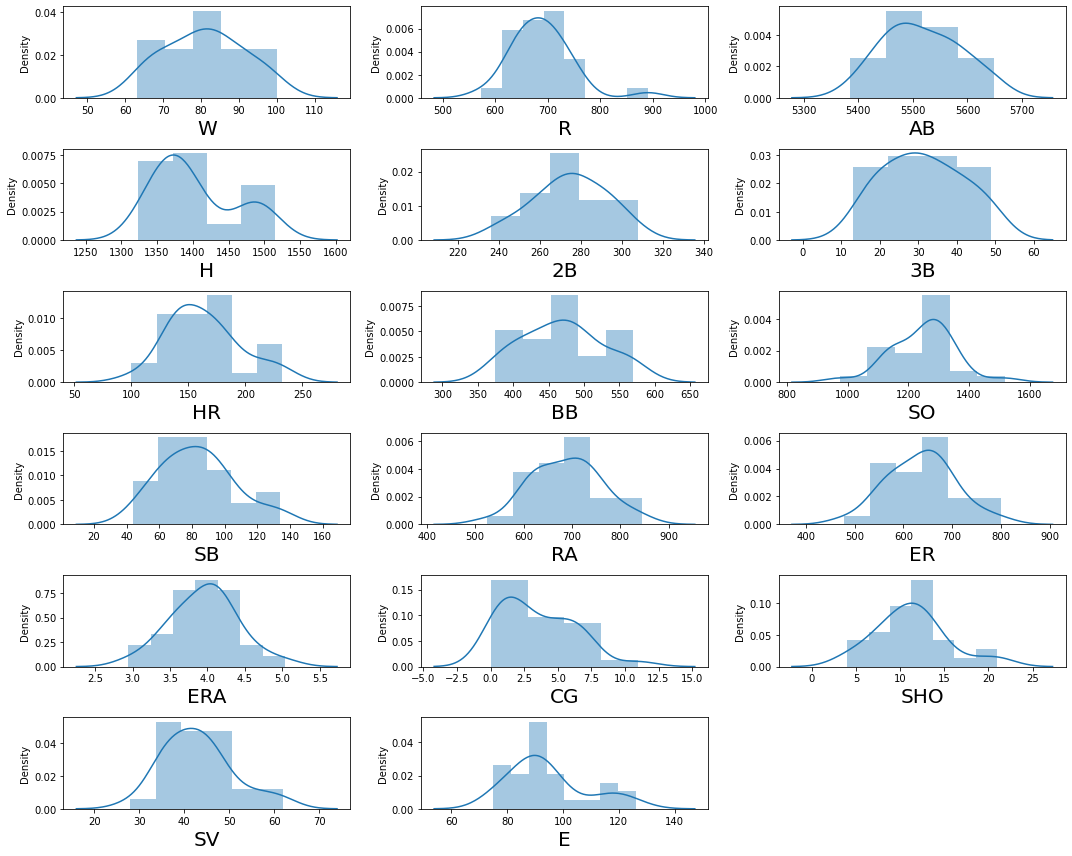

In [9]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [ ]:
from the above plots we see that all the columns are normally distributed and there is no skewness present.

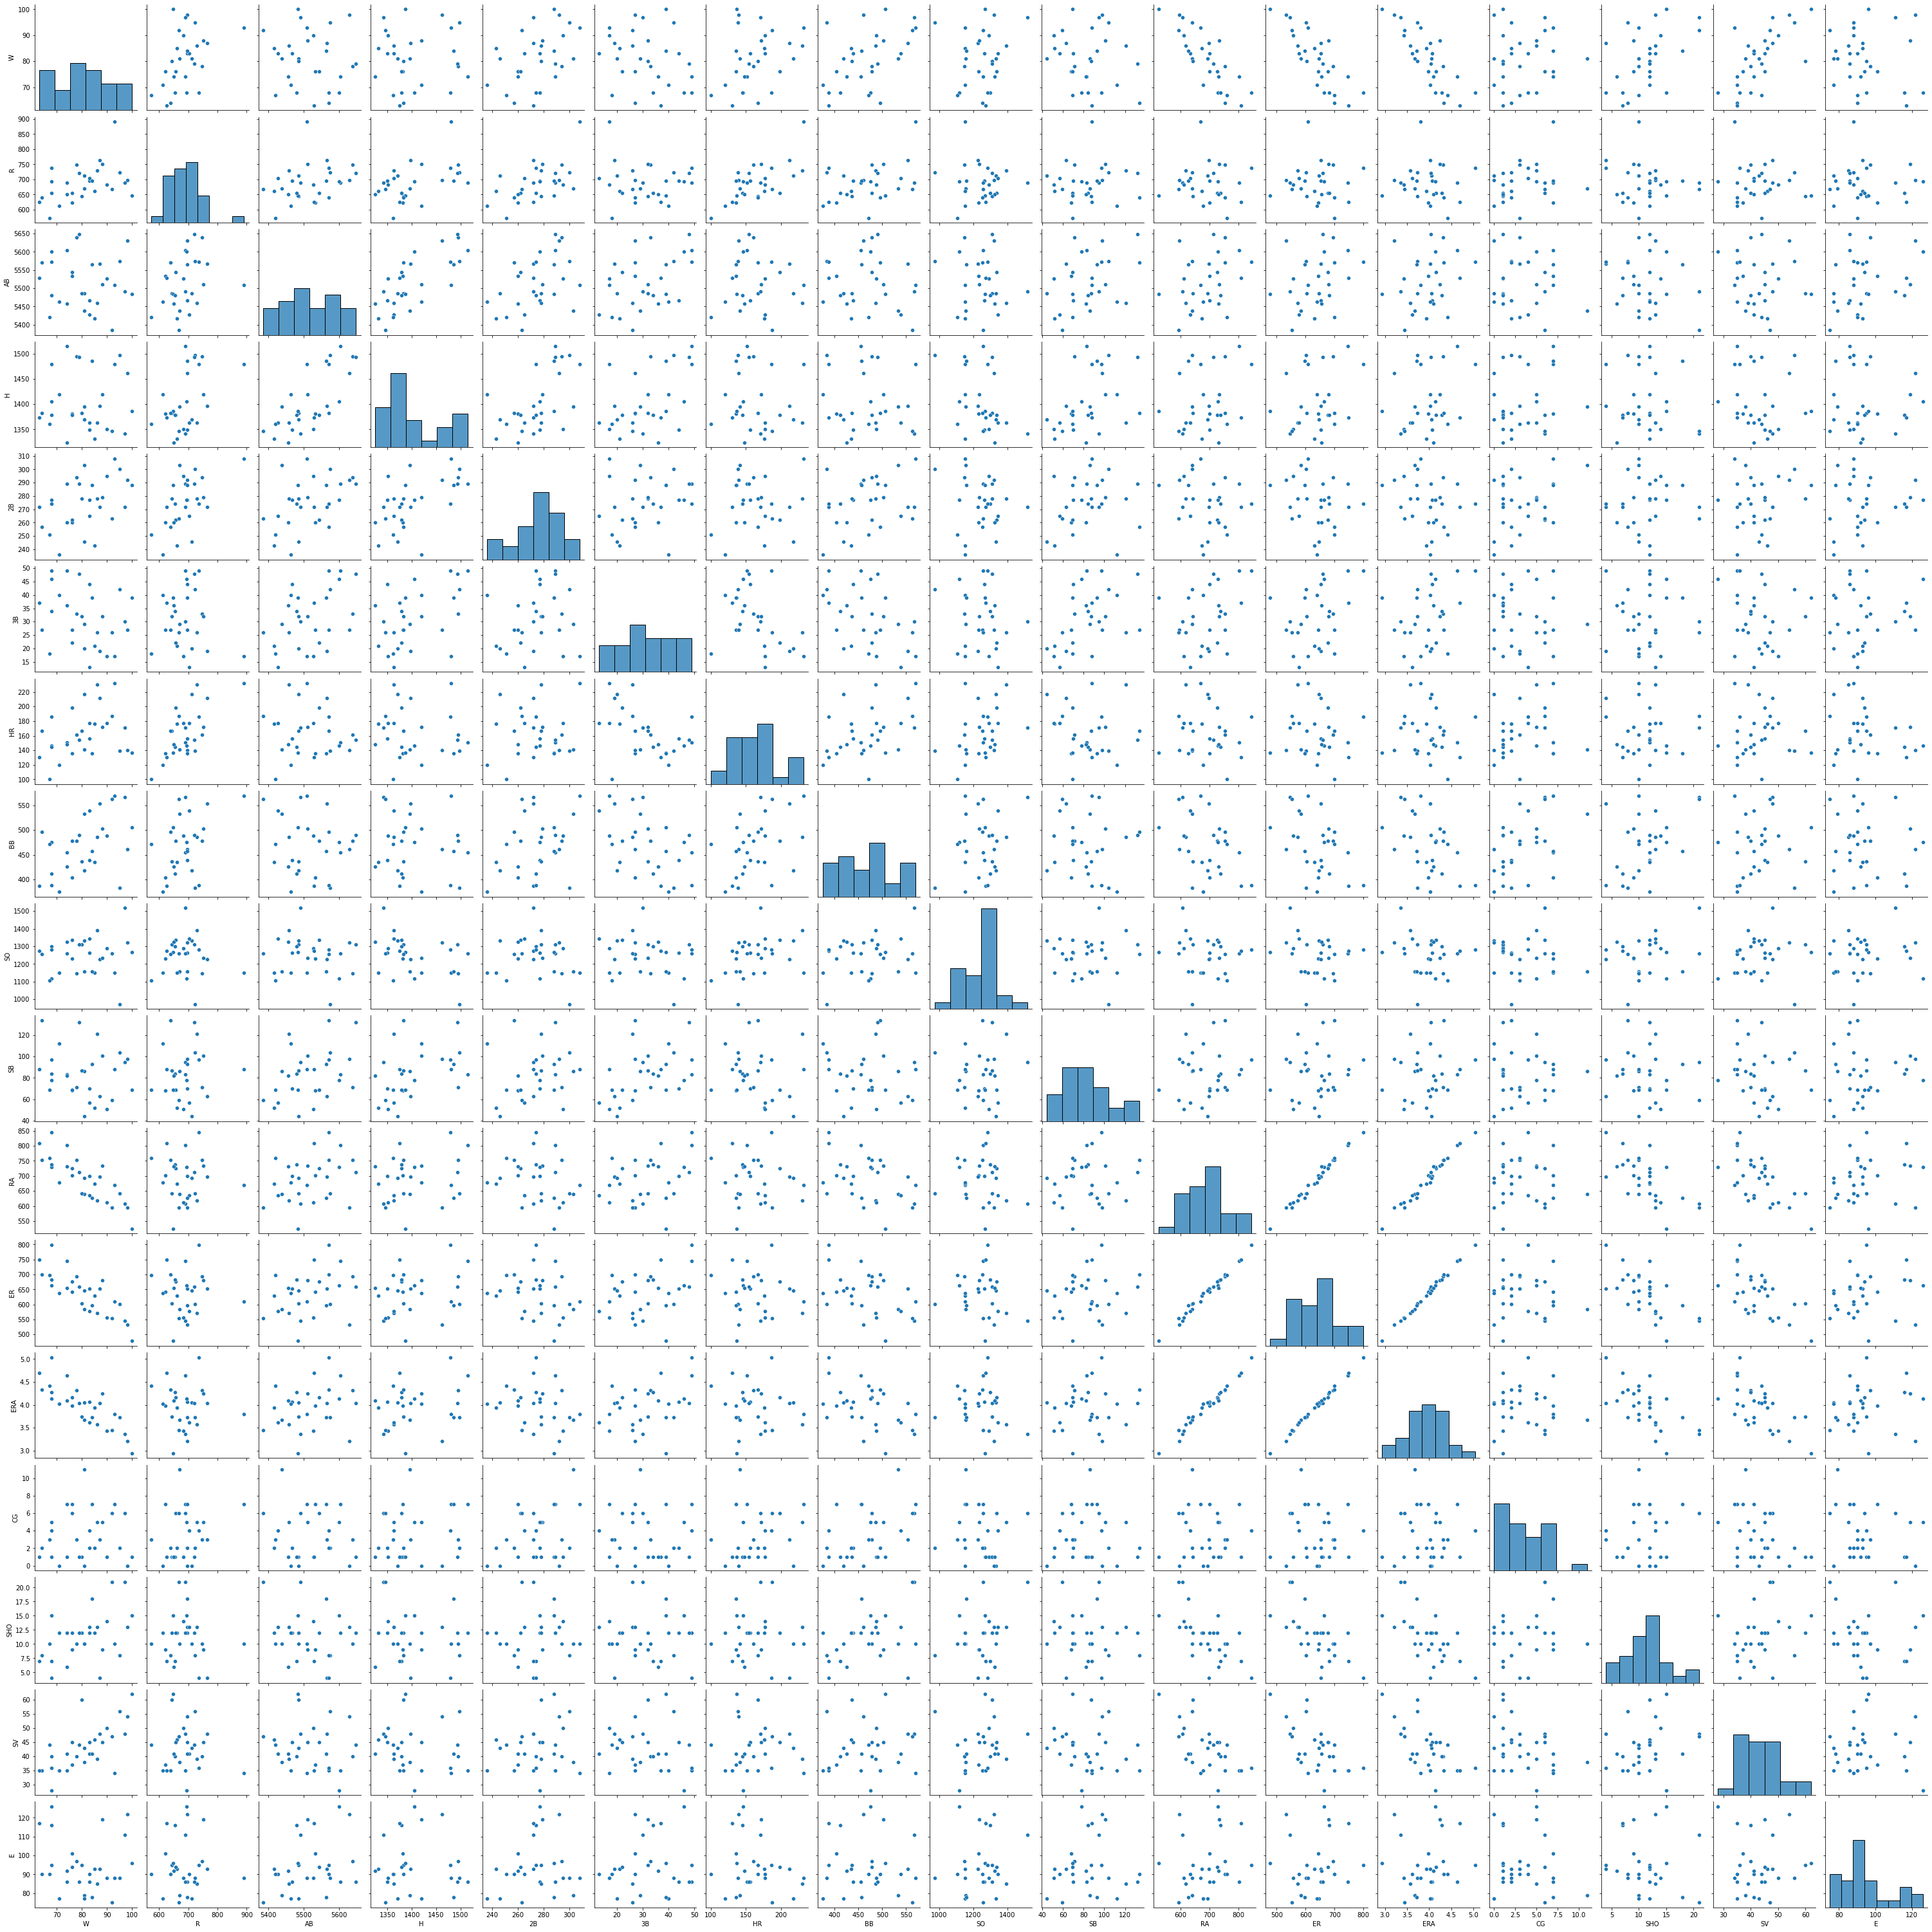

In [10]:
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

In [9]:
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

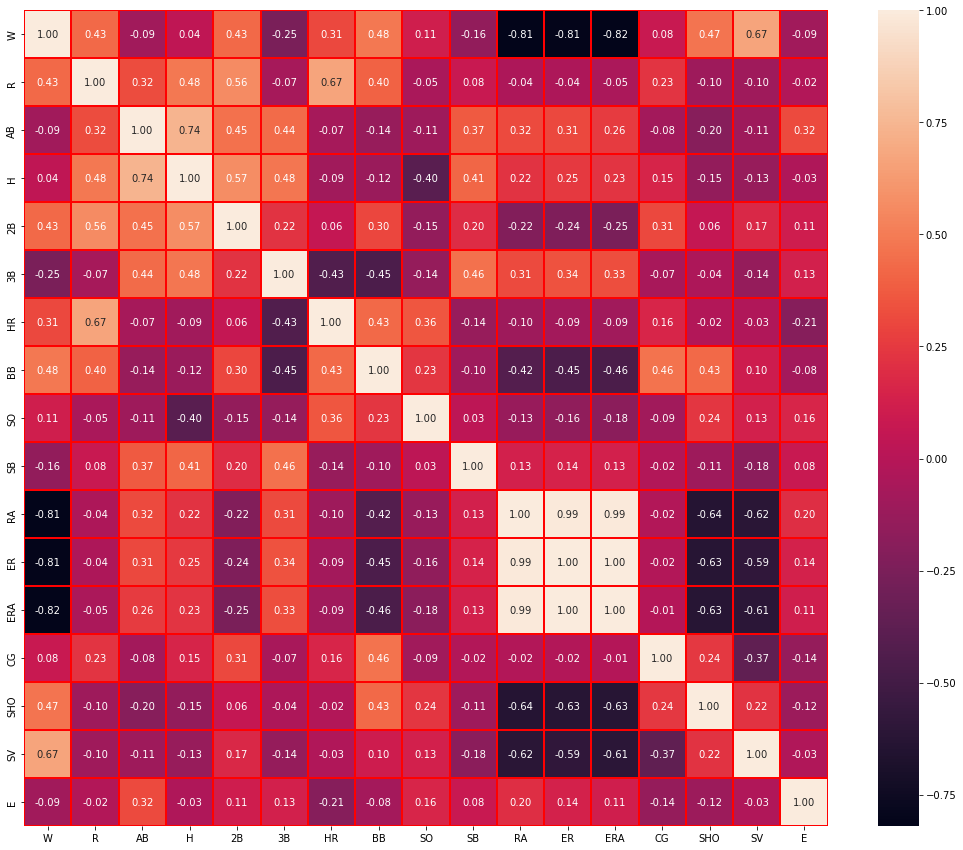

In [10]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
plt.show()

# Outlier detection

In [11]:
colllist = data.columns.values
ncol = 30
nrows = 14

In [12]:
colllist

array(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype=object)

In [13]:
len(colllist)

17

In [14]:
len(range(0,len(colllist)))

17

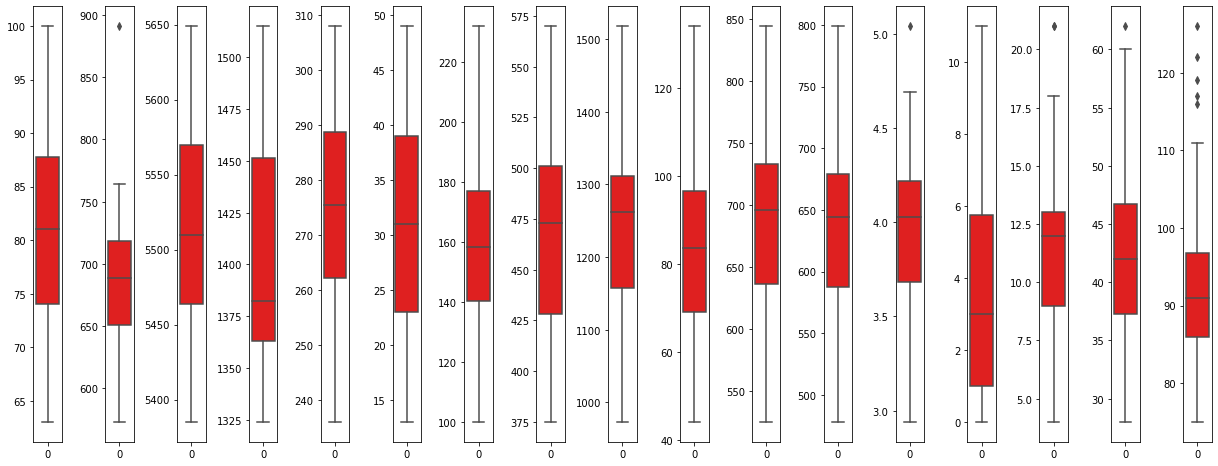

In [15]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(colllist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[colllist[i]],color='red',orient='v')
    plt.tight_layout()

There are no outliers present in the columns ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA','ER','CG].
and the columns ['ERA','SHO', 'SV'] have only 1 outlier where the column 'E' has 5 outliers.

# Removing Outliers

In [16]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [17]:
data_new = data[(z<3).all(axis=1)]
data_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [18]:
data.shape,data_new.shape

((30, 17), (29, 17))

# Data Loss Percentage

In [19]:
data_loss_percent = ((30-29)/30)*100
data_loss_percent

3.3333333333333335

On outlier removal we are losing only 3 % data.

# Checking for Multicollinearity

Let's divide our dataset into Features and Label.

In [20]:
X = data.drop(columns = ["W"])
y = data["W"]

In [21]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X,0.8)
len(set(corr_features))

2

In [23]:
corr_features

{'ER', 'ERA'}

hence we have to drop these two features from our dataset to resolve the multicollinearity problem.

In [24]:
X = X.drop(corr_features,axis = 1)

In [25]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97


In [26]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Scaling the dataset using min max scaler method

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 47)

In [46]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# DecisionTreeRegressor

In [47]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
y_pred1 = dt.predict(x_test)

In [49]:
print("MAE : ",mean_absolute_error(y_test,y_pred1))
print("MSE : ",mean_squared_error(y_test,y_pred1))
print("R2 Score : ",r2_score(y_test,y_pred1))

MAE :  7.833333333333333
MSE :  94.5
R2 Score :  0.3118932038834952


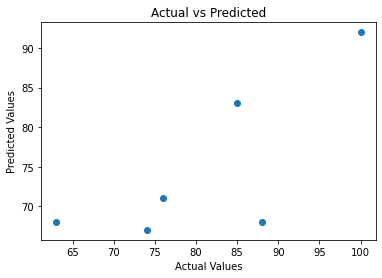

In [50]:
plt.scatter(x=y_test,y=y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted")
plt.show()

# LinearRegression

In [51]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred2 = lr.predict(x_test)

In [53]:
print("MAE : ",mean_absolute_error(y_test,y_pred2))
print("MSE : ",mean_squared_error(y_test,y_pred2))
print("R2 Score : ",r2_score(y_test,y_pred2))

MAE :  3.221419637299338
MSE :  12.187021574562783
R2 Score :  0.9112595516415332


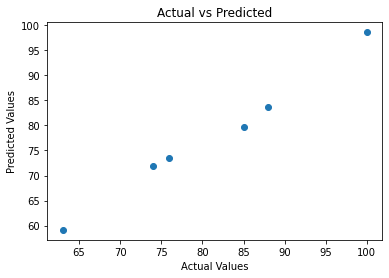

In [54]:
plt.scatter(x=y_test,y=y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted")
plt.show()

# RandomForestRegressor

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
y_pred3 = rf.predict(x_test)

In [59]:
print("MAE : ",mean_absolute_error(y_test,y_pred3))
print("MSE : ",mean_squared_error(y_test,y_pred3))
print("R2 Score : ",r2_score(y_test,y_pred3))

MAE :  6.831666666666666
MSE :  69.79558333333331
R2 Score :  0.4917797330097089


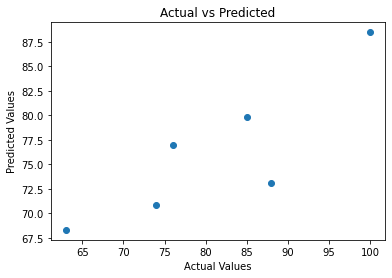

In [60]:
plt.scatter(x=y_test,y=y_pred3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted")
plt.show()

# KNeighborsRegressor

In [61]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
y_pred4 = knn.predict(x_test)

In [63]:
print("MAE : ",mean_absolute_error(y_test,y_pred4))
print("MSE : ",mean_squared_error(y_test,y_pred4))
print("R2 Score : ",r2_score(y_test,y_pred4))

MAE :  7.2
MSE :  64.94666666666667
R2 Score :  0.5270873786407766


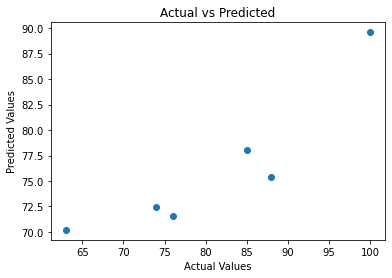

In [64]:
plt.scatter(x=y_test,y=y_pred4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted")
plt.show()

# GradientBoostingRegressor

In [65]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [67]:
y_pred5 = gb.predict(x_test)

In [68]:
print("MAE : ",mean_absolute_error(y_test,y_pred5))
print("MSE : ",mean_squared_error(y_test,y_pred5))
print("R2 Score : ",r2_score(y_test,y_pred5))

MAE :  7.443656964406171
MSE :  77.57105425936052
R2 Score :  0.43516222626679235


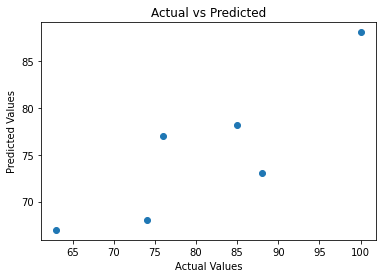

In [69]:
plt.scatter(x=y_test,y=y_pred5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted")
plt.show()

In [72]:
result = pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','GradientBoostingRegressor'],
                      'R2 Score':[0.9112595516415332,0.3118932038834952,0.4917797330097089,0.5270873786407766,0.43516222626679235]})
result

,Model,R2 Score
0,LinearRegression,0.911260
1,DecisionTreeRegressor,0.311893
2,RandomForestRegressor,0.491780
3,KNeighborsRegressor,0.527087
4,GradientBoostingRegressor,0.435162


From the above result we can see that the value of R2 Score is maximum for LinearRegresson model.
Hence we select LineartRegresson model as a final model.

# Model Saving

In [70]:
import pickle

In [73]:
filename = 'Baseball.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [74]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

91.12595516415331


In [75]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred2[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5
Predicted,98.623886,73.587178,71.833164,83.784439,59.133298,79.709517
Original,98.623886,73.587178,71.833164,83.784439,59.133298,79.709517
